### Primary Visual Area (VISp)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cell_metrics_VISp.csv")

In [3]:
sorted(list(df.columns))

['all_stim',
 'area',
 'cell_specimen_id',
 'donor_full_genotype',
 'drifting_grating_large',
 'drifting_grating_small',
 'dsi_dg',
 'experiment_container_id',
 'failed_experiment_container',
 'g_dsi_dg',
 'g_osi_dg',
 'g_osi_sg',
 'image_sel_ns',
 'imaging_depth',
 'locally_sparse_noise_off_large',
 'locally_sparse_noise_off_small',
 'locally_sparse_noise_on_large',
 'locally_sparse_noise_on_small',
 'natural_movie_one_a_large',
 'natural_movie_one_a_small',
 'natural_movie_one_b_large',
 'natural_movie_one_b_small',
 'natural_movie_one_c_large',
 'natural_movie_one_c_small',
 'natural_movie_three_large',
 'natural_movie_three_small',
 'natural_movie_two_large',
 'natural_movie_two_small',
 'natural_scene_large',
 'natural_scene_small',
 'osi_dg',
 'osi_sg',
 'p_dg',
 'p_ns',
 'p_run_mod_dg',
 'p_run_mod_ns',
 'p_run_mod_sg',
 'p_sg',
 'peak_dff_dg',
 'peak_dff_ns',
 'peak_dff_sg',
 'pref_dir_dg',
 'pref_image_ns',
 'pref_ori_sg',
 'pref_phase_sg',
 'pref_sf_sg',
 'pref_tf_dg',
 'rece

"osi_dg", "osi_sg"
$$
OSI = \frac{R_{pref} - R_{orth}}{R_{pref} + R_{orth}}
$$

"dsi_dg"
$$
DSI = \frac{R_{pref} - R_{null}}{R_{pref} + R_{null}}
$$

Preferred:
- "pref_dir_dg": preferred direction dynamic gratings [degrees]
- "pref_tf_dg": preferred temporal frequency dynamic gratings [Hz]
- "pref_ori_sg": preferred orientation static gratings [degrees]
- "pref_sf_sg": preferred spatial frequency static gratings [cycles/degree]
- "pref_phase_sg": preferred phase static gratings

More useful columns:
- "failed_experiment_container": we want this to False

In [4]:
id_cols = [
    "experiment_container_id", "cell_specimen_id"
]

sg_cols = [
    "pref_ori_sg", "pref_sf_sg", "pref_phase_sg"
]

dg_cols = [
    "pref_dir_dg", "pref_tf_dg"
]

opt_cols = [
    "osi_dg", "osi_sg", "dsi_dg"
]

In [5]:
df[df["cell_specimen_id"]==541511982][id_cols+sg_cols+dg_cols+opt_cols]

,experiment_container_id,cell_specimen_id,pref_ori_sg,pref_sf_sg,pref_phase_sg,pref_dir_dg,pref_tf_dg,osi_dg,osi_sg,dsi_dg
14421,536323956,541511982,30.0,0.04,0.5,180.0,1.0,1.299244,1.270104,0.316621


In [6]:
df[df["cell_specimen_id"]==541513580][id_cols+sg_cols+dg_cols+opt_cols]

,experiment_container_id,cell_specimen_id,pref_ori_sg,pref_sf_sg,pref_phase_sg,pref_dir_dg,pref_tf_dg,osi_dg,osi_sg,dsi_dg
14619,536323956,541513580,60.0,0.04,0.25,225.0,2.0,1.055554,1.075116,0.111651


In [7]:
len(df)

63251

In [8]:
df = df[df["failed_experiment_container"]=="f"]
len(df)

63251

### Static Gratings

In [9]:
df_sg = df[id_cols+sg_cols].dropna()

len(df_sg)

30997

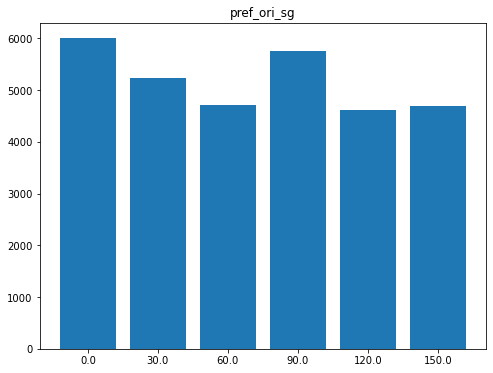

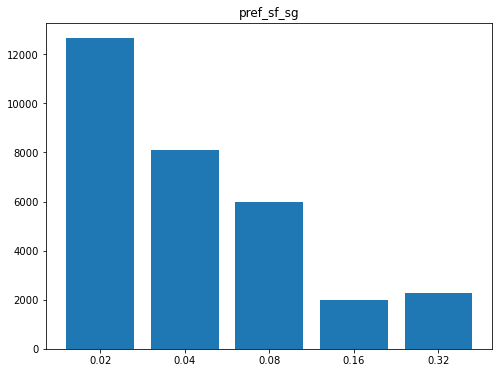

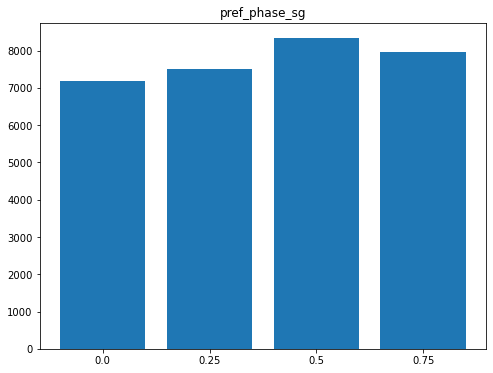

In [10]:
for c in sg_cols:
    print()
    print()
    plt.figure(figsize=(8, 6))
    plt.title(c)
    b = df_sg.groupby(c).count().iloc[:,0]
    x = b.index.tolist()
    h = b.tolist()
    plt.xticks(range(len(x)), x)
    plt.bar(range(len(x)), h)
    plt.show()

### Dynamic Gratings

In [11]:
df_dg = df[id_cols+dg_cols].dropna()

len(df_dg)

29635

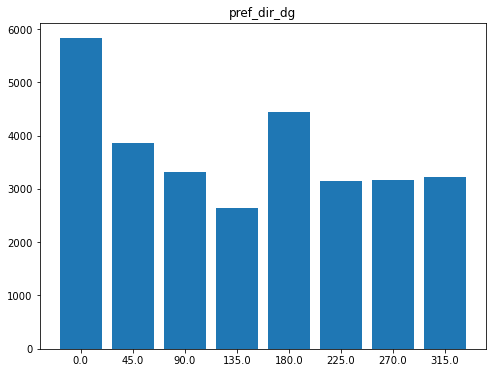

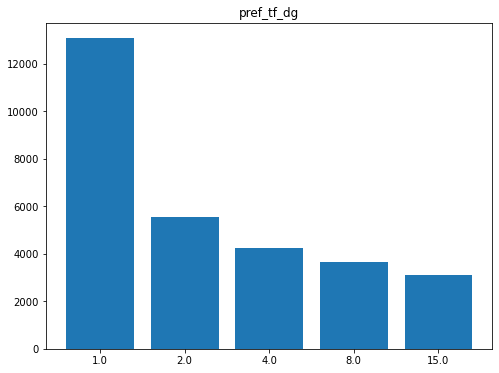

In [12]:
for c in dg_cols:
    print()
    print()
    plt.figure(figsize=(8, 6))
    plt.title(c)
    b = df_dg.groupby(c).count().iloc[:,0]
    x = b.index.tolist()
    h = b.tolist()
    plt.xticks(range(len(x)), x)
    plt.bar(range(len(x)), h)
    plt.show()